# **Libraries**
---

In [1]:
import sys
import os
os.chdir("..") # Change working directory to project root

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

# Module
from src.modules.data_processing import DataLoader

# **Import Data**
---

In [14]:
data_loader = DataLoader()

# Load datasets
original_df = data_loader.load_original_dataset()
competition_train_df, competition_test_df = data_loader.load_competition_datasets()

# Combine datasets
bank_data = data_loader.combine_datasets()

# **Exploratory**
---

In [15]:
bank_data.describe()

,Exited,Balance,CreditScore,HasCrCard,CustomerId,IsActiveMember,EstimatedSalary,NumOfProducts,Age,Tenure
count,175034.000000,175034.000000,175034.000000,175034.000000,1.750340e+05,175034.00000,175034.000000,175034.00000,175034.000000,175034.000000
mean,0.211148,56678.299368,656.115835,0.751185,1.569194e+07,0.49876,111861.556577,1.55307,38.171360,5.019922
std,0.408124,62982.565768,81.151171,0.432327,7.142890e+04,0.50000,50815.382991,0.54921,8.969552,2.811136
min,0.000000,0.000000,350.000000,0.000000,1.556570e+07,0.00000,11.580000,1.00000,18.000000,0.000000
25%,0.000000,0.000000,597.000000,1.000000,1.563288e+07,0.00000,73192.370000,1.00000,32.000000,3.000000
50%,0.000000,0.000000,659.000000,1.000000,1.569017e+07,0.00000,116969.730000,2.00000,37.000000,5.000000
75%,0.000000,120729.297500,710.000000,1.000000,1.575666e+07,1.00000,154767.340000,2.00000,42.000000,7.000000
max,1.000000,250898.090000,850.000000,1.000000,1.581569e+07,1.00000,199992.480000,4.00000,92.000000,10.000000


In [16]:
# Check for missing values
print("Missing values per column:")
print(bank_data.isnull().sum())

Missing values per column:
Exited             0
Surname            0
Balance            0
Geography          0
CreditScore        0
HasCrCard          0
CustomerId         0
IsActiveMember     0
EstimatedSalary    0
NumOfProducts      0
Age                0
Tenure             0
Gender             0
dtype: int64


In [17]:
# Check for duplicated values
duplicate_count = bank_data.duplicated().sum()
print(f"Number of duplicated rows: {duplicate_count}")

# If duplicates exist, drop them
if duplicate_count > 0:
    bank_data = bank_data.drop_duplicates()
    print("Duplicated rows have been removed.")
else:
    print("No duplicated rows found.")

Number of duplicated rows: 0
No duplicated rows found.


In [18]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175034 entries, 0 to 175033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Exited           175034 non-null  int64  
 1   Surname          175034 non-null  object 
 2   Balance          175034 non-null  float64
 3   Geography        175034 non-null  object 
 4   CreditScore      175034 non-null  int64  
 5   HasCrCard        175034 non-null  float64
 6   CustomerId       175034 non-null  int64  
 7   IsActiveMember   175034 non-null  float64
 8   EstimatedSalary  175034 non-null  float64
 9   NumOfProducts    175034 non-null  int64  
 10  Age              175034 non-null  float64
 11  Tenure           175034 non-null  int64  
 12  Gender           175034 non-null  object 
dtypes: float64(5), int64(5), object(3)
memory usage: 17.4+ MB


# **Visualization**
---

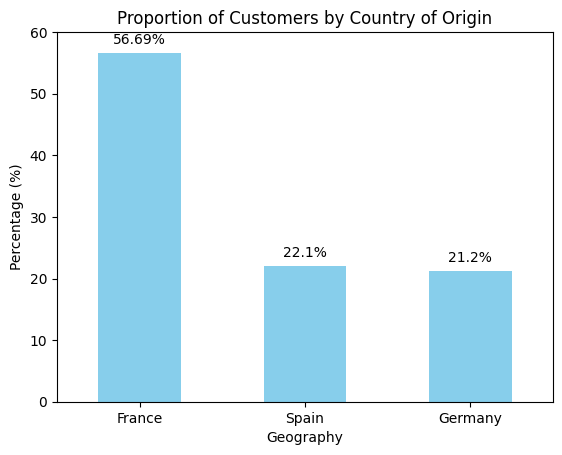

In [19]:
# The proportion of customers' country of origin as a bar chart
geo_counts = bank_data['Geography'].value_counts(normalize=True).mul(100).round(2)
ax = geo_counts.plot(kind='bar', color='skyblue')
plt.title("Proportion of Customers by Country of Origin")
plt.ylabel("Percentage (%)")
plt.xlabel("Geography")
plt.ylim(0, 60)
plt.xticks(rotation=360)

for i, v in enumerate(geo_counts):
    ax.text(i, v + 1, f"{v}%", ha='center', va='bottom')

plt.show()

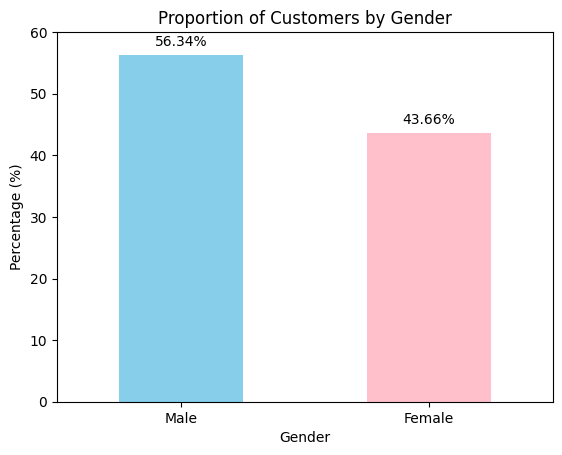

In [20]:
# The proportion of customers' gender as a bar chart
gender_counts = bank_data['Gender'].value_counts(normalize=True).mul(100).round(2)
gender_colors = ['pink' if gender == 'Female' else 'skyblue' for gender in gender_counts.index]
ax = gender_counts.plot(kind='bar', color=gender_colors)
plt.title("Proportion of Customers by Gender")
plt.ylabel("Percentage (%)")
plt.xlabel("Gender")
plt.ylim(0, 60)
plt.xticks(rotation=360)

for i, v in enumerate(gender_counts):
    ax.text(i, v + 1, f"{v}%", ha='center', va='bottom')

plt.show()

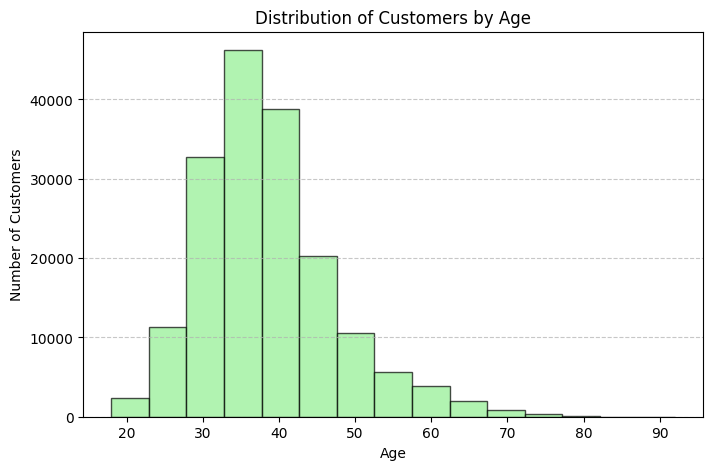

In [21]:
# The proportion of customers' age as a histogram
plt.figure(figsize=(8, 5))
plt.hist(bank_data['Age'], bins=15, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title("Distribution of Customers by Age")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


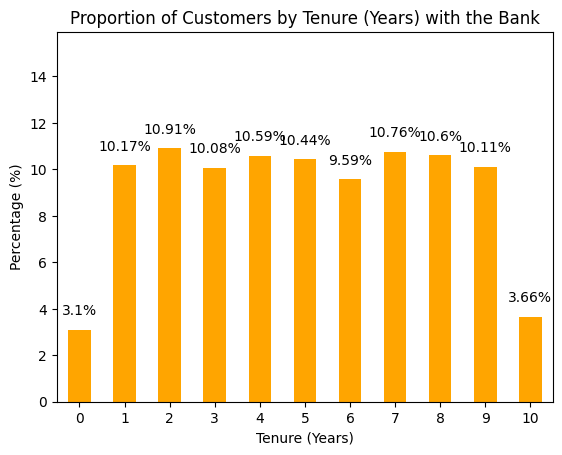

In [22]:
# The proportion of customers' tenure (in years) with the bank as a bar chart
tenure_counts = bank_data['Tenure'].value_counts(normalize=True).sort_index().mul(100).round(2)
ax = tenure_counts.plot(kind='bar', color='orange')
plt.title("Proportion of Customers by Tenure (Years) with the Bank")
plt.xlabel("Tenure (Years)")
plt.ylabel("Percentage (%)")
plt.ylim(0, tenure_counts.max() + 5)
plt.xticks(rotation=0)

for i, v in enumerate(tenure_counts):
    ax.text(i, v + 0.5, f"{v}%", ha='center', va='bottom')

plt.show()


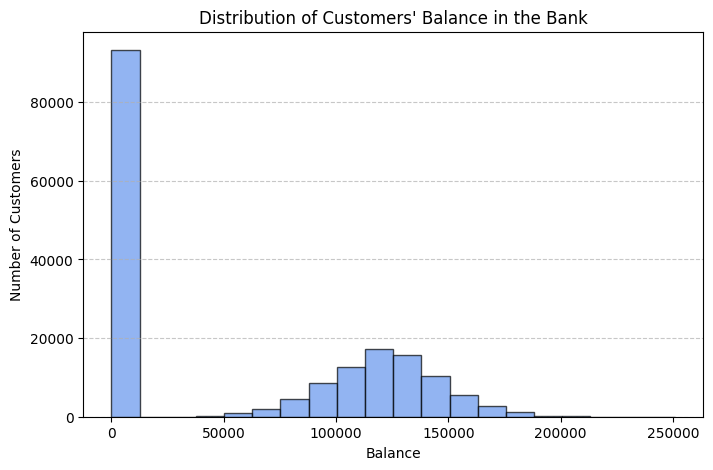

In [23]:
# Show the distribution of customers' balance using a histogram
plt.figure(figsize=(8, 5))
plt.hist(bank_data['Balance'], bins=20, color='cornflowerblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Customers' Balance in the Bank")
plt.xlabel("Balance")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


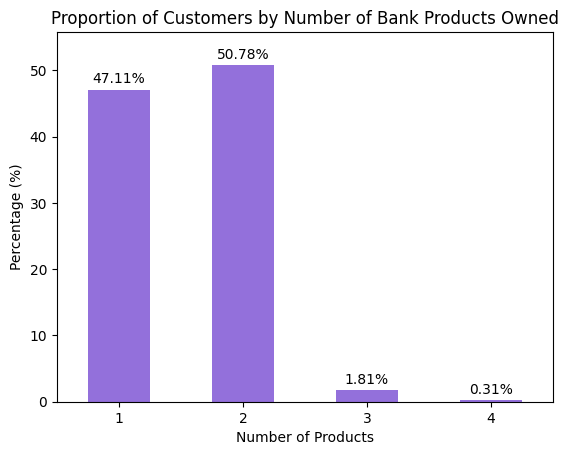

In [24]:
# Bar chart to show the proportion of customers' bank product ownership
product_counts = bank_data['NumOfProducts'].value_counts(normalize=True).sort_index().mul(100).round(2)
ax = product_counts.plot(kind='bar', color='mediumpurple')
plt.title("Proportion of Customers by Number of Bank Products Owned")
plt.xlabel("Number of Products")
plt.ylabel("Percentage (%)")
plt.ylim(0, product_counts.max() + 5)
plt.xticks(rotation=0)

for i, v in enumerate(product_counts):
    ax.text(i, v + 0.5, f"{v}%", ha='center', va='bottom')

plt.show()


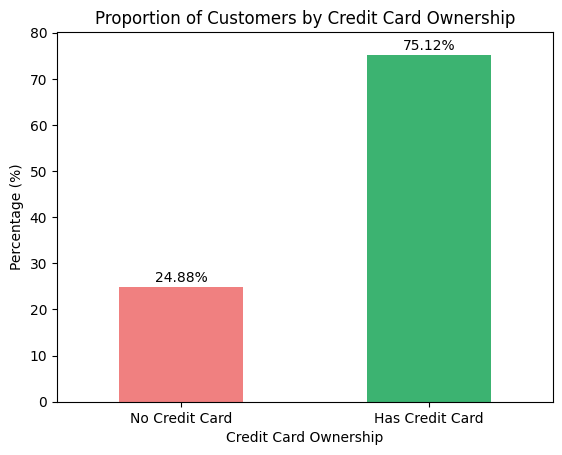

In [25]:
# Bar chart to show the proportion of customers with and without credit card ownership
credit_card_counts = bank_data['HasCrCard'].value_counts(normalize=True).sort_index().mul(100).round(2)
labels = ['No Credit Card', 'Has Credit Card']
ax = credit_card_counts.plot(kind='bar', color=['lightcoral', 'mediumseagreen'])
plt.title("Proportion of Customers by Credit Card Ownership")
plt.xlabel("Credit Card Ownership")
plt.ylabel("Percentage (%)")
plt.ylim(0, credit_card_counts.max() + 5)
plt.xticks(ticks=[0, 1], labels=labels, rotation=0)

for i, v in enumerate(credit_card_counts):
    ax.text(i, v + 0.5, f"{v}%", ha='center', va='bottom')

plt.show()


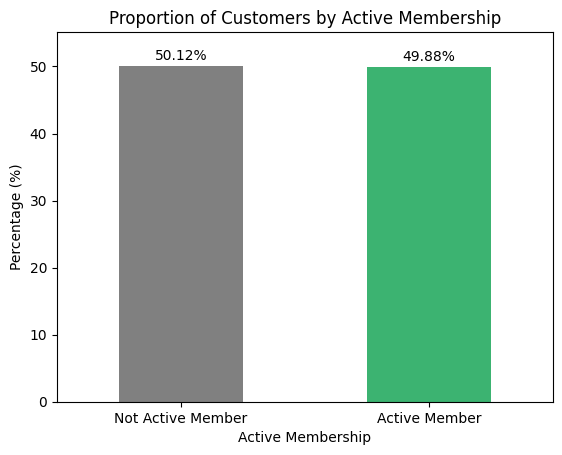

In [26]:
# Bar chart to show the proportion of customers who are and are not active members
active_member_counts = bank_data['IsActiveMember'].value_counts(normalize=True).sort_index().mul(100).round(2)
labels = ['Not Active Member', 'Active Member']
ax = active_member_counts.plot(kind='bar', color=['gray', 'mediumseagreen'])
plt.title("Proportion of Customers by Active Membership")
plt.xlabel("Active Membership")
plt.ylabel("Percentage (%)")
plt.ylim(0, active_member_counts.max() + 5)
plt.xticks(ticks=[0, 1], labels=labels, rotation=0)

for i, v in enumerate(active_member_counts):
    ax.text(i, v + 0.5, f"{v}%", ha='center', va='bottom')

plt.show()



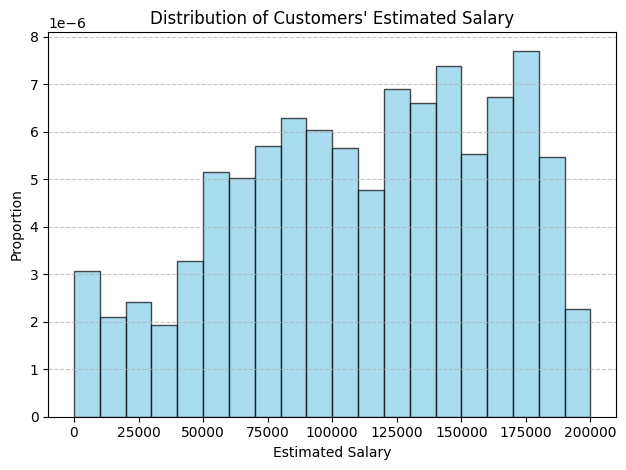

In [27]:
# Histogram to show the proportion of customers' estimated salary

# Plot histogram
ax = bank_data['EstimatedSalary'].plot(
    kind='hist',
    bins=20,
    color='skyblue',
    edgecolor='black',
    density=True,
    alpha=0.7
)
plt.title("Distribution of Customers' Estimated Salary")
plt.xlabel("Estimated Salary")
plt.ylabel("Proportion")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



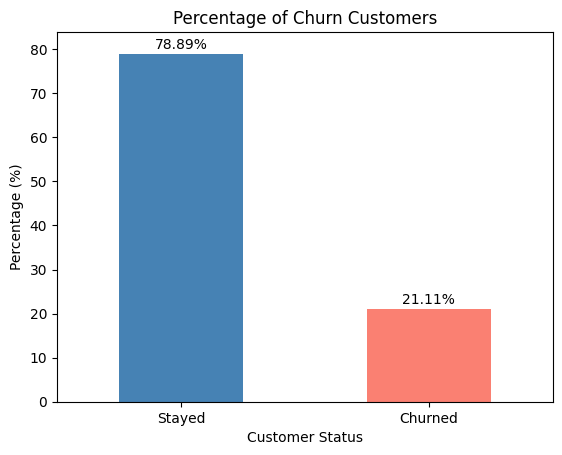

In [28]:
# Bar chart to show the percentage of churn customers (Exited)
churn_counts = bank_data['Exited'].value_counts(normalize=True).sort_index().mul(100).round(2)
labels = ['Stayed', 'Churned']
ax = churn_counts.plot(kind='bar', color=['steelblue', 'salmon'])
plt.title("Percentage of Churn Customers")
plt.xlabel("Customer Status")
plt.ylabel("Percentage (%)")
plt.ylim(0, churn_counts.max() + 5)
plt.xticks(ticks=[0, 1], labels=labels, rotation=0)

for i, v in enumerate(churn_counts):
    ax.text(i, v + 0.5, f"{v}%", ha='center', va='bottom')

plt.show()

## **Handle Noise**
---

In [29]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175034 entries, 0 to 175033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Exited           175034 non-null  int64  
 1   Surname          175034 non-null  object 
 2   Balance          175034 non-null  float64
 3   Geography        175034 non-null  object 
 4   CreditScore      175034 non-null  int64  
 5   HasCrCard        175034 non-null  float64
 6   CustomerId       175034 non-null  int64  
 7   IsActiveMember   175034 non-null  float64
 8   EstimatedSalary  175034 non-null  float64
 9   NumOfProducts    175034 non-null  int64  
 10  Age              175034 non-null  float64
 11  Tenure           175034 non-null  int64  
 12  Gender           175034 non-null  object 
dtypes: float64(5), int64(5), object(3)
memory usage: 17.4+ MB


In [30]:
# Separate numerical and categorical columns
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [33]:
#Function for K and M numerical formatting
def thousands_format(x, pos):
    abs_x = abs(x)
    if abs_x >= 1000000:
        formatted = f"{abs_x/1000000:.0f}M"
    elif abs_x >= 1000:
        formatted = f"{abs_x/1000:.0f}K"
    else:
        formatted = f"{int(abs_x)}"
    
    return f'-{formatted}' if x < 0 else formatted

formatter = FuncFormatter(thousands_format)



In [34]:
def iqr_calculate(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    return Q1, Q3, IQR, lower_bound, upper_bound, outlier_count

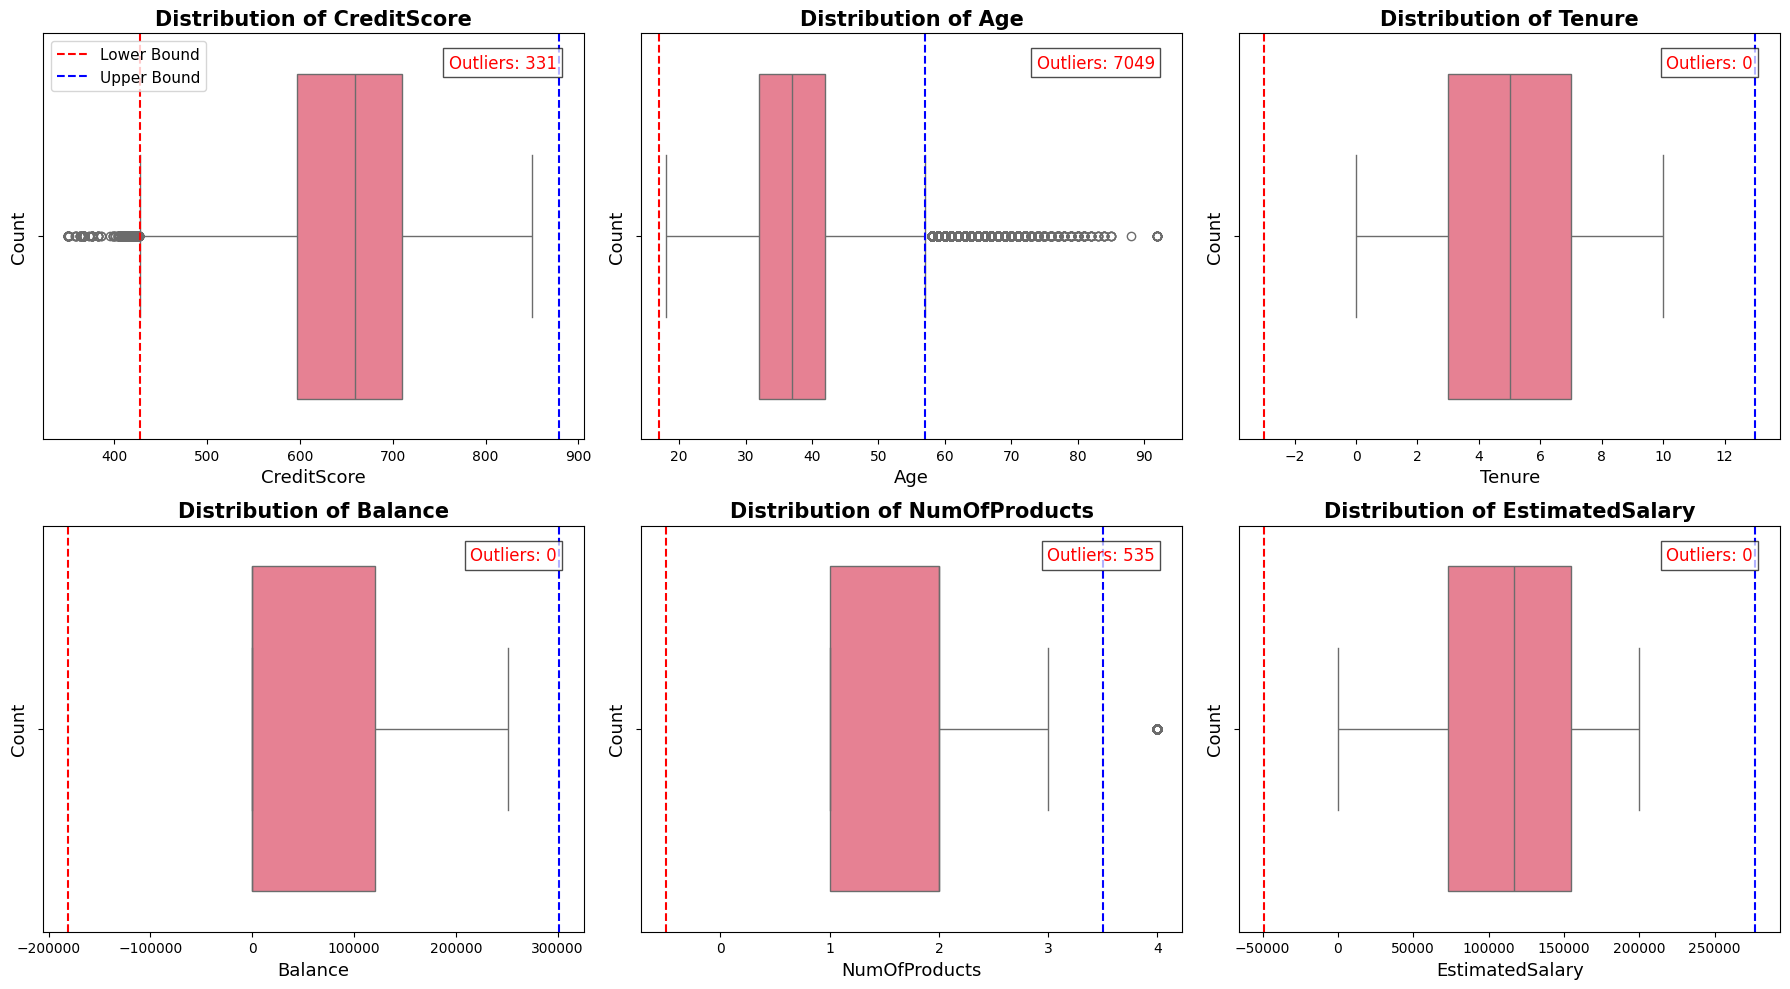

In [35]:
# Box plots
outlier_summary = {}

plt.figure(figsize=(18, 10))

for i, col in enumerate(numerical_features):
    ax = plt.subplot(2, 3, i + 1)
    sns.boxplot(data=bank_data, x=col, ax=ax)

    Q1, Q3, IQR, lower_bound, upper_bound, outlier_count = iqr_calculate(bank_data, col)
    outlier_summary[col] = outlier_count

    ax.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    ax.axvline(upper_bound, color='blue', linestyle='--', label='Upper Bound')

    ax.set_title(f'Distribution of {col}', fontsize=15, fontweight='bold')
    ax.set_xlabel(col, fontsize=13)
    ax.set_ylabel('Count', fontsize=13)

    ax.text(0.95, 0.95, f'Outliers: {outlier_count}', 
            verticalalignment='top', horizontalalignment='right', 
            transform=ax.transAxes, fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.7))

    if i == 0:
        ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

In [37]:
from pandas.io.formats.style import Styler

# Outliers summary as a DataFrame
outlier_df = pd.DataFrame([
    {
        "Feature": col,
        "Outlier Count": count,
        "Outlier Percentage": (count / len(bank_data)) * 100
    }
    for col, count in outlier_summary.items()
])

outlier_df = outlier_df.set_index("Feature")
display(outlier_df.style.format({"Outlier Percentage": "{:.2f}%"}))

,Outlier Count,Outlier Percentage
Feature,,
CreditScore,331,0.19%
Age,7049,4.03%
Tenure,0,0.00%
Balance,0,0.00%
NumOfProducts,535,0.31%
EstimatedSalary,0,0.00%


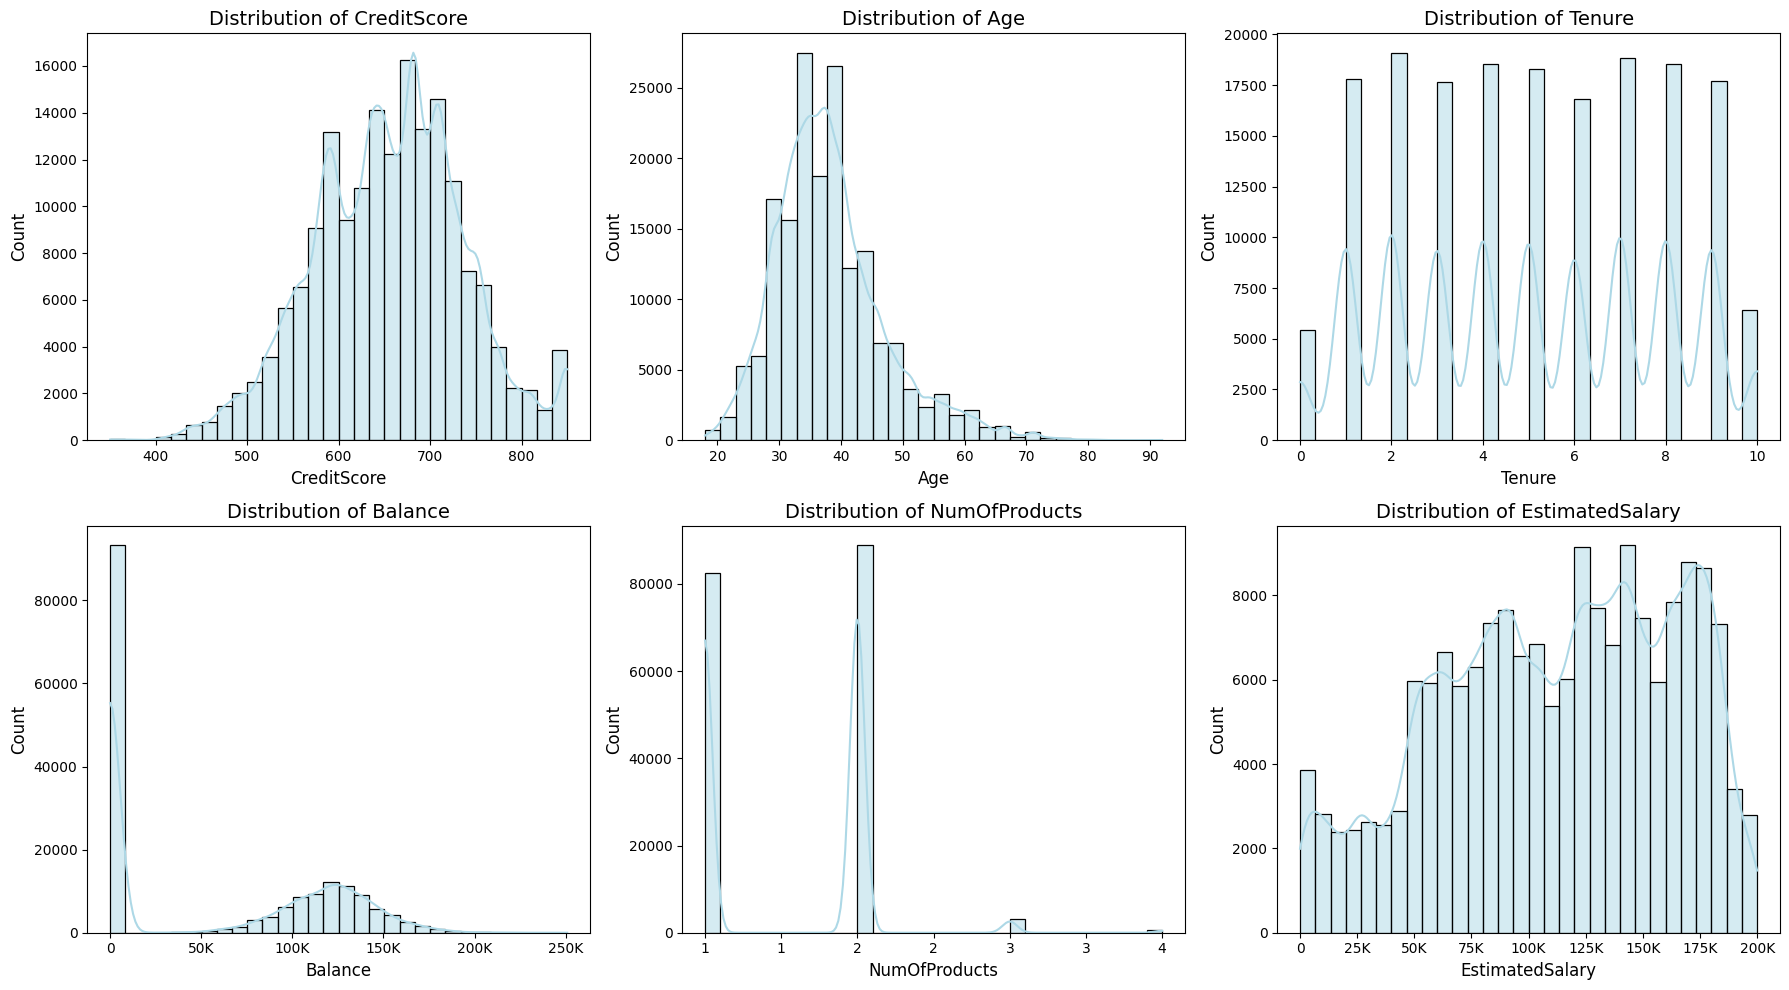

In [38]:
# Hisplots
plt.figure(figsize=(18,10))

for i, col in enumerate(numerical_features):
    ax=plt.subplot(2, 3, i+1)
    sns.histplot(data=bank_data, x=col, kde=True, bins=30,ax=ax, color='lightblue', edgecolor='black')

    ax.set_title(f'Distribution of {col}', fontsize =14)
    ax.set_xlabel(col,fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.tick_params(axis='both', labelsize=10)

    ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

## **Correlation**
---

In [39]:
# Find the correlation between numerical variables
corr_matrix = bank_data.corr(numeric_only=True)
print(corr_matrix)

                   Exited   Balance  CreditScore  HasCrCard  CustomerId  \
Exited           1.000000  0.128378    -0.027248  -0.021122   -0.009721   
Balance          0.128378  1.000000     0.005583  -0.020311   -0.008823   
CreditScore     -0.027248  0.005583     1.000000  -0.002573    0.007273   
HasCrCard       -0.021122 -0.020311    -0.002573   1.000000   -0.005896   
CustomerId      -0.009721 -0.008823     0.007273  -0.005896    1.000000   
IsActiveMember  -0.207214 -0.014123     0.015373  -0.020681   -0.002697   
EstimatedSalary  0.018610  0.004397    -0.000817   0.004932    0.003888   
NumOfProducts   -0.204506 -0.357269     0.011589   0.005600    0.005182   
Age              0.336597  0.063262    -0.008870  -0.012608    0.003080   
Tenure          -0.019238 -0.009662     0.000945   0.006410   -0.002057   

                 IsActiveMember  EstimatedSalary  NumOfProducts       Age  \
Exited                -0.207214         0.018610      -0.204506  0.336597   
Balance             

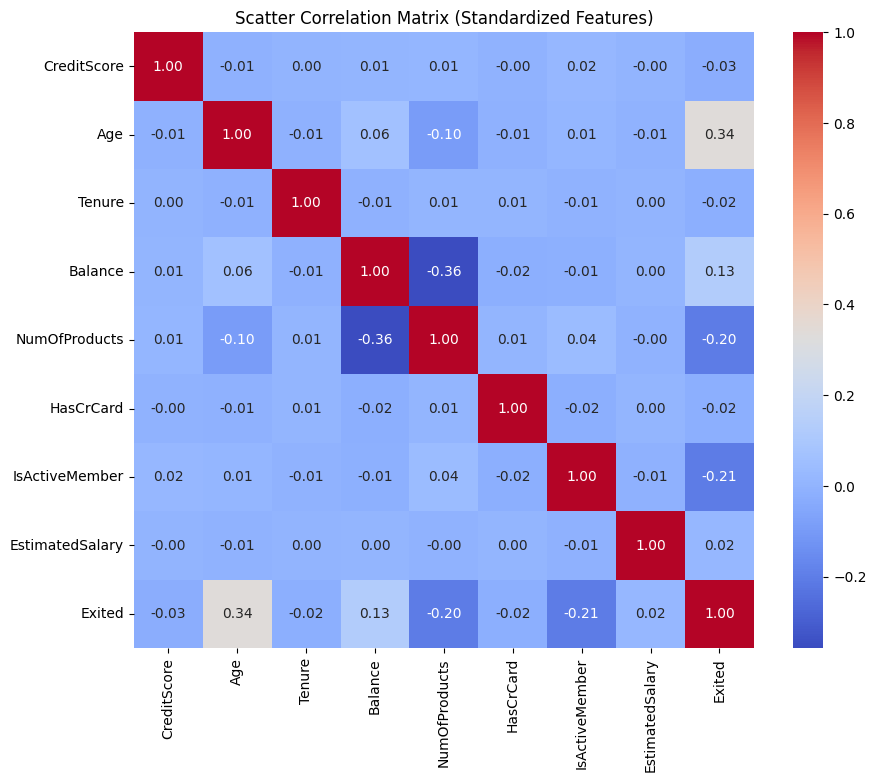

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

# Select numerical features for correlation matrix
num_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bank_data[num_features])

# Compute correlation matrix using numpy (as sklearn does not have direct correlation matrix)
corr_matrix = np.corrcoef(X_scaled, rowvar=False)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=num_features, yticklabels=num_features)
plt.title("Scatter Correlation Matrix (Standardized Features)")
plt.show()

